In [5]:
# Standard libraries
import datetime, time
import pandas as pd
import numpy as np
from datetime import datetime

# Visualisations libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg

# Text analysis libraries
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from string import punctuation 

# Image analysis libraries
import pytesseract
import cv2
import os
from PIL import Image
from pytesseract import Output

### 1. General Dataset Analysis

In [6]:
# Load in data
df = pd.read_csv('data/df_fin.csv')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,User,Tweet,Date,Language,Hashtags,Image
0,rDankChristian,The beacons are lit! https://t.co/oAymDXtB7z\n...,2021-12-31,en,"[{'text': 'Dank', 'indices': [71, 76]}, {'text...",http://pbs.twimg.com/media/FP_QQDyX0AUc-24.jpg
1,rDankChristian,MY BROTHER IN CHRIST https://t.co/uupYN5kCYN\n...,2021-12-31,en,"[{'text': 'Dank', 'indices': [71, 76]}, {'text...",http://pbs.twimg.com/media/FP_QRoiXsAE4eS5.png
2,rDankChristian,Sweet home Alabama! https://t.co/oH65xHomsf\nF...,2021-12-31,en,"[{'text': 'Dank', 'indices': [70, 75]}, {'text...",http://pbs.twimg.com/media/FP_QSZAXEAkr7Vy.jpg
3,rDankChristian,Sad other disciple noises https://t.co/KRTWhsU...,2021-12-31,en,"[{'text': 'Dank', 'indices': [76, 81]}, {'text...",http://pbs.twimg.com/media/FP_QTO6XEAYnnTY.jpg
4,dizzibot1,Gravity \nmeme by - PTomCruiser1\n#memes #fun...,2019-04-28,en,"[{'text': 'memes', 'indices': [33, 39]}, {'tex...",http://pbs.twimg.com/media/FP8mIsHWUAAmqSY.jpg
...,...,...,...,...,...,...
544,Preciou58087818,Vorto Gaming😎\n #MemeDaily @NearMemeDaily @vor...,2021-10-20,en,"[{'text': 'MemeDaily', 'indices': [15, 25]}, {...",http://pbs.twimg.com/media/FP-sqVyWQAc9o6H.jpg
545,Preciou58087818,Vorto Gaming😎\n #MemeDaily @NearMemeDaily @vor...,2021-10-20,en,"[{'text': 'MemeDaily', 'indices': [15, 25]}, {...",http://pbs.twimg.com/media/FP-0vaCXsAkmNEL.jpg
546,Preciou58087818,Vorto Gaming😎\n #MemeDaily @NearMemeDaily @vor...,2021-10-20,en,"[{'text': 'MemeDaily', 'indices': [15, 25]}, {...",http://pbs.twimg.com/media/FP-02PjX0Ag5wBm.jpg
547,LoudBol_,Wish one could say no to that 😂\n\n#meme #meme...,2022-02-14,en,"[{'text': 'meme', 'indices': [33, 38]}, {'text...",http://pbs.twimg.com/media/FP-4PreXoAM7b3b.jpg


In [7]:
print(df.shape)

(549, 6)


In [8]:
df.describe()

,User,Tweet,Date,Language,Hashtags,Image
count,549,549,549,549,549,549
unique,314,549,282,1,429,549
top,churkakiller,The beacons are lit! https://t.co/oAymDXtB7z\n...,2010-12-06,en,"[{'text': 'Samocro', 'indices': [10, 18]}, {'t...",http://pbs.twimg.com/media/FP_QQDyX0AUc-24.jpg
freq,23,1,23,549,42,1


In [9]:
miss_df = df.isnull().sum(axis = 0).reset_index()
miss_df.columns = ['variable', 'missing values']
miss_df['filling factor (%)'] = (df.shape[0] - miss_df['missing values']) / df.shape[0] * 100
miss_df.sort_values('filling factor (%)').reset_index(drop = True)
miss_df

,variable,missing values,filling factor (%)
0,User,0,100.0
1,Tweet,0,100.0
2,Date,0,100.0
3,Language,0,100.0
4,Hashtags,0,100.0
5,Image,0,100.0


In [10]:
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [11]:
unidf = return_unique_values(df)
print(unidf)

   Features  Uniques
0      User      314
1     Tweet      549
2      Date      282
3  Language        1
4  Hashtags      429
5     Image      549


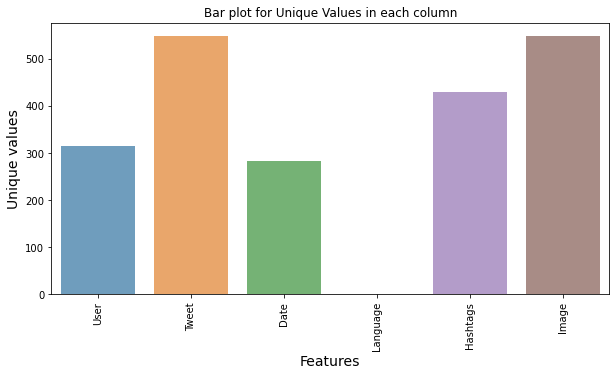

In [12]:
f, ax = plt.subplots(1,1, figsize=(10,5))

sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [13]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(16,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of Unique {} tweeting'.format(feature))
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\richa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


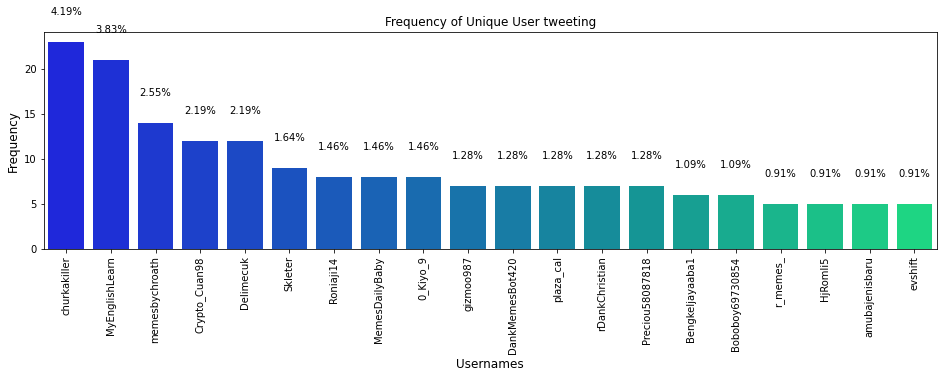

In [14]:
plot_frequency_charts(df, 'User', 'Usernames', 'winter')

### 2. Text Analysis

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def punctuation_stopwords_removal(sms):
    # Filters charecter-by-charecter : ['h', 'e', 'e', 'l', 'o', 'o', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 'p', 'u', 'r', 'v', 'a']
    remove_punctuation = [ch for ch in sms if ch not in punctuation]
    # Convert them back to sentences and split into words
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_sms = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_sms

In [17]:
def draw_bar_graph_for_text_visualization(df):
    tweets_from_loc = df.copy()
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['Tweet'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Most Prevelant Words")
    plt.xticks(rotation='vertical');

In [18]:
def draw_word_cloud(df, title):
    loc_df = df.copy()
    loc_df.loc[:, 'Tweet'] = loc_df['Tweet'].apply(punctuation_stopwords_removal)
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(loc_df['Tweet']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

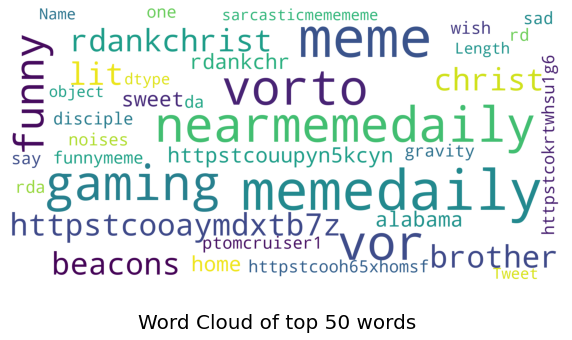

In [19]:
draw_word_cloud(df, 'Word Cloud of top 50 words')

C:\Users\richa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\richa\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 129392 missing from current font.
  font.set_text(s, 0, flags=flags)


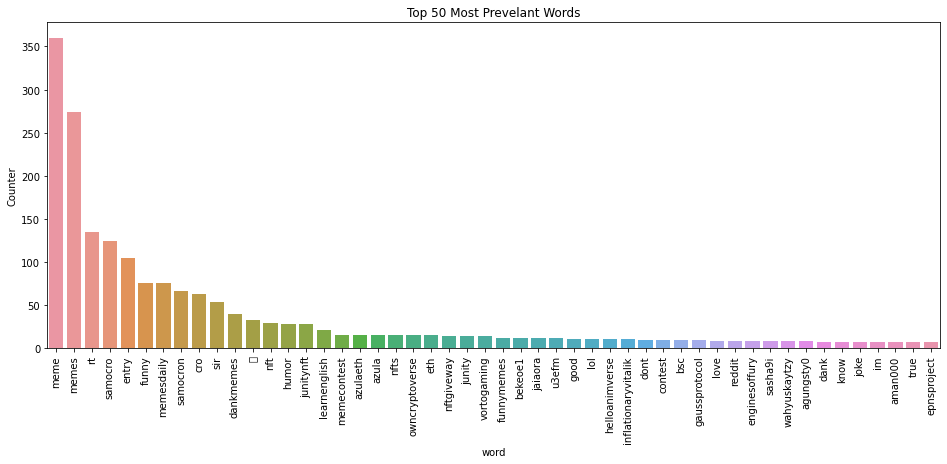

In [20]:
draw_bar_graph_for_text_visualization(df)

### 3. Image-with-text Analysis

In [21]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\richa\AppData\Local\Programs\Tesseract-OCR\Tesseract.exe"

In [25]:
f = []
t = []
input_dir = r'C:/Users/richa/OneDrive/Documenten/GitHub/master_thesis_2022/data/images/'

for root, dirs, filenames in os.walk(input_dir):
    for filename in filenames:
        try:
            print(filename)
            f.append(filename)
            img = Image.open(input_dir + filename)
            text = pytesseract.image_to_string(img)
            t.append(text)
            print(text)
            print('-='*20)
        except:
            continue


df = pd.DataFrame(list(zip(f, t)), columns = ['Image_name', 'Tweet'])

0lysGcwBXws39tur.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
0Pjx7fvOhurOzBKh.jpg
EES ALE OP


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
0yocJlrbk_BESop4.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
0YwJIgNqX-3QhEvg.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
0ZLDCc30D9ljPLPw.jpg
Moderator


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
1lv6NwN15ElNJHDg.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
1OQCLH-a_sNw8YHB.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
1tPPbqY47IqSssAR.jpg
J

TikTok

@acememes1 adem S|


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
2YxqaZmwWXvVBQUw.jpg
Wn Gira Gi lxamvarnral Galle

i

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
4L7gQnR_ngsxb0sF.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
5rklJLbS--S-BXy4.jpg
6S4CNZnYtxwB-khP.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
7tOcGsjPIyDvxdsx.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
8ItPvig9FKmOiBoh.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
ajixn7HtxaAbya6n.jpg

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
asz4xGWTOhX

In [26]:
df

,Image_name,Tweet
0,0lysGcwBXws39tur.jpg,
1,0Pjx7fvOhurOzBKh.jpg,EES ALE OP\n\n
2,0yocJlrbk_BESop4.jpg,
3,0YwJIgNqX-3QhEvg.jpg,
4,0ZLDCc30D9ljPLPw.jpg,Moderator\n\n
...,...,...
534,vRQXxbUnuS4s02Ew.jpg,
535,WvaQzUzFYPtPH1mx.jpg,
536,xhlPx9OLj8EcudbD.jpg,
537,Xz_iRZFce9FjPv2h.jpg,’\n\nSamoCro\n


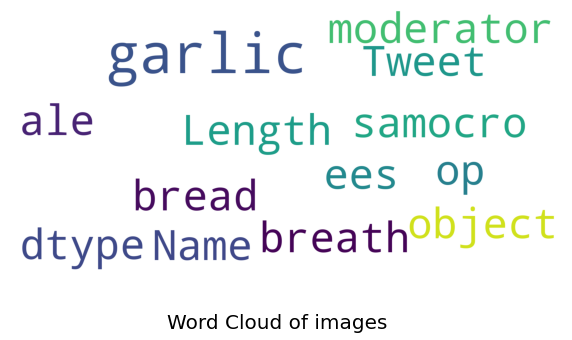

In [27]:
draw_word_cloud(df, 'Word Cloud of images')

In [28]:
def draw_bar_graph_for_text_visualization_2(df):
    tweets_from_loc = df.copy()
    tweets_from_loc.loc[:, 'text'] = tweets_from_loc['Tweet'].apply(punctuation_stopwords_removal)
    loc_tweets_curated = tweets_from_loc['text'].tolist()
    loc_tweet_list = []
    for sublist in loc_tweets_curated:
        for word in sublist:
            loc_tweet_list.append(word)
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'Counter'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='Counter', 
                data=loc_top_30_words, ax=ax)
    plt.title("Most Prevelant Words & Symbols")
    plt.xticks(rotation='vertical');

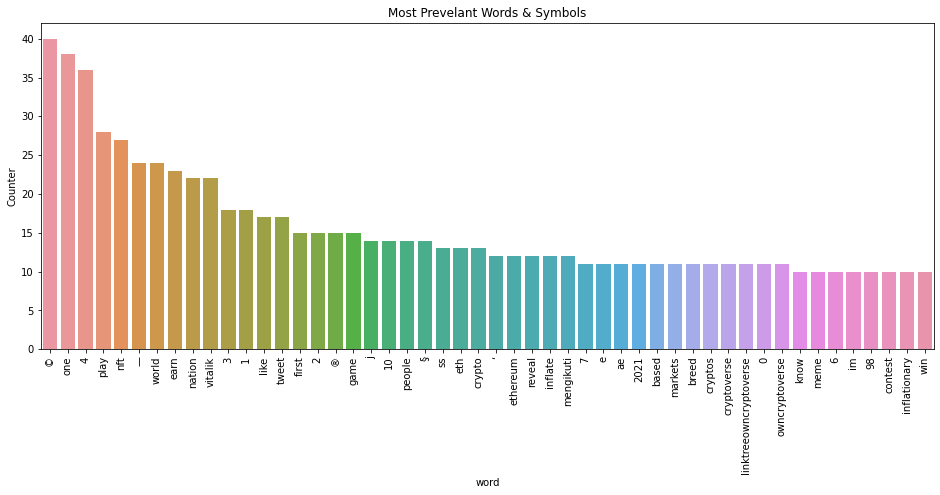

In [29]:
draw_bar_graph_for_text_visualization_2(df)